# **Baseline**
A baseline in machine learning serves as a simple reference point to evaluate the performance of more complex models.

Models used:

*   Logistic Regression.
*   Decision Tree.
*   Random Forest.

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
# Reading Dataset
df = pd.read_csv('/content/drive/MyDrive/Predictive Analysis CA/Predictive Analysis CA/Data/full_data_flightdelay.csv')

In [ ]:
# Dispaying Head
df.head().transpose()

,0,1,2,3,4
MONTH,1,1,1,1,1
DAY_OF_WEEK,7,7,7,7,7
DEP_DEL15,0,0,0,0,0
DEP_TIME_BLK,0800-0859,0700-0759,0600-0659,0600-0659,0001-0559
DISTANCE_GROUP,2,7,7,9,7
SEGMENT_NUMBER,1,1,1,1,1
CONCURRENT_FLIGHTS,25,29,27,27,10
NUMBER_OF_SEATS,143,191,199,180,182
CARRIER_NAME,Southwest Airlines Co.,Delta Air Lines Inc.,Delta Air Lines Inc.,Delta Air Lines Inc.,Spirit Air Lines
AIRPORT_FLIGHTS_MONTH,13056,13056,13056,13056,13056


In [ ]:
# Taking Random Sample of Dataset
df = df.sample(n=10000)

# **Logistic Regression**

In [ ]:
# Dropping rows with missing values
df = df.dropna()

# Defining features and target variable
X = df.drop(columns=['DEP_DEL15'])
y = df['DEP_DEL15']

# Categorizing columns into categorical and numerical features
categorical_cols = ['MONTH', 'DAY_OF_WEEK', 'DEP_TIME_BLK', 'CARRIER_NAME',
                    'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']
numerical_cols = ['DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS',
                  'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH', 'PLANE_AGE',
                  'LATITUDE', 'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


In [ ]:
# Defining the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Creating a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Making predictions on the validation set
y_pred = pipeline.predict(X_val)

# Evaluating the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8095

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1615
           1       0.55      0.06      0.10       385

    accuracy                           0.81      2000
   macro avg       0.68      0.52      0.50      2000
weighted avg       0.76      0.81      0.74      2000



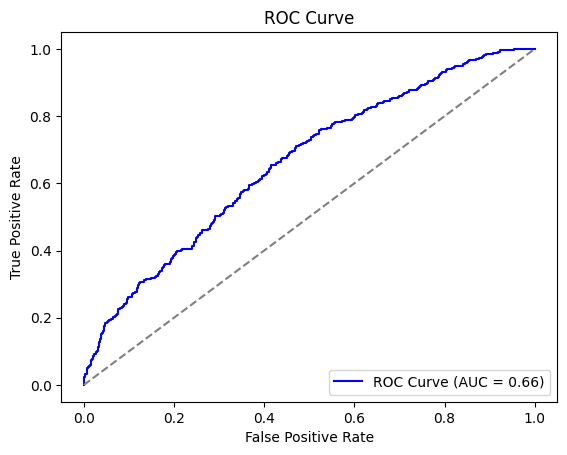

In [ ]:
# ROC for Logistic Regression
y_pred_prob = pipeline.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

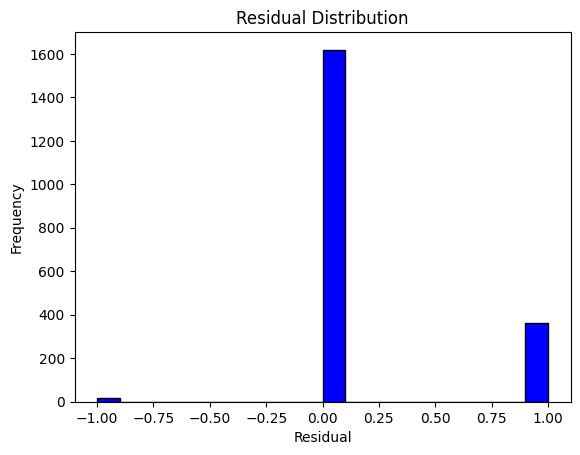

In [ ]:
# Calculate residuals
residuals = y_val - y_pred

# Plot histogram
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# **Decision Tree**

In [ ]:
# Creating a pipeline with preprocessing and a Decision Tree Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Making predictions on the validation set
y_pred = pipeline.predict(X_val)

# Evaluating the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.708

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1615
           1       0.26      0.27      0.26       385

    accuracy                           0.71      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.71      0.71      0.71      2000



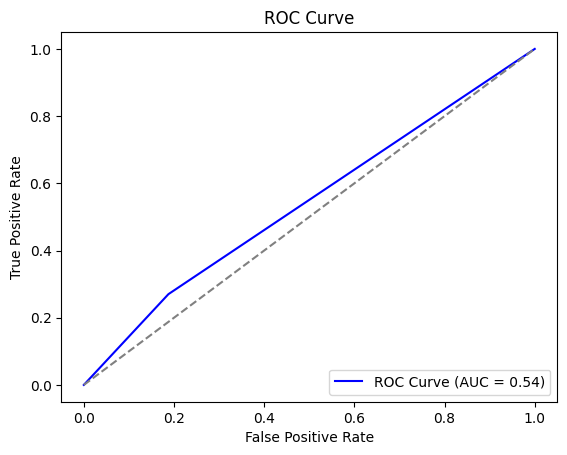

In [ ]:
# ROC for Decision Tree
y_pred_prob = pipeline.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

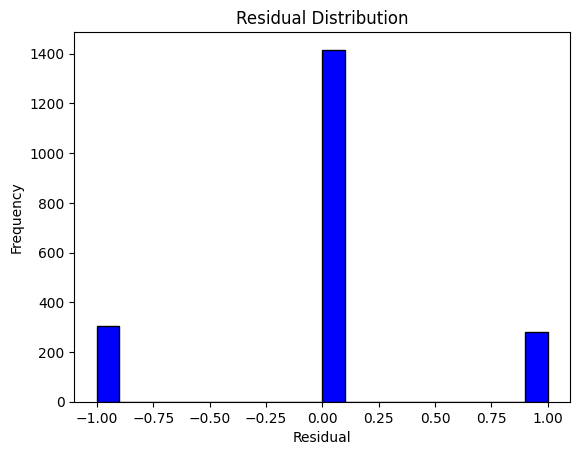

In [ ]:
# Calculate residuals
residuals = y_val - y_pred

# Plot histogram
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# **Feature Importance for Decision Tree**

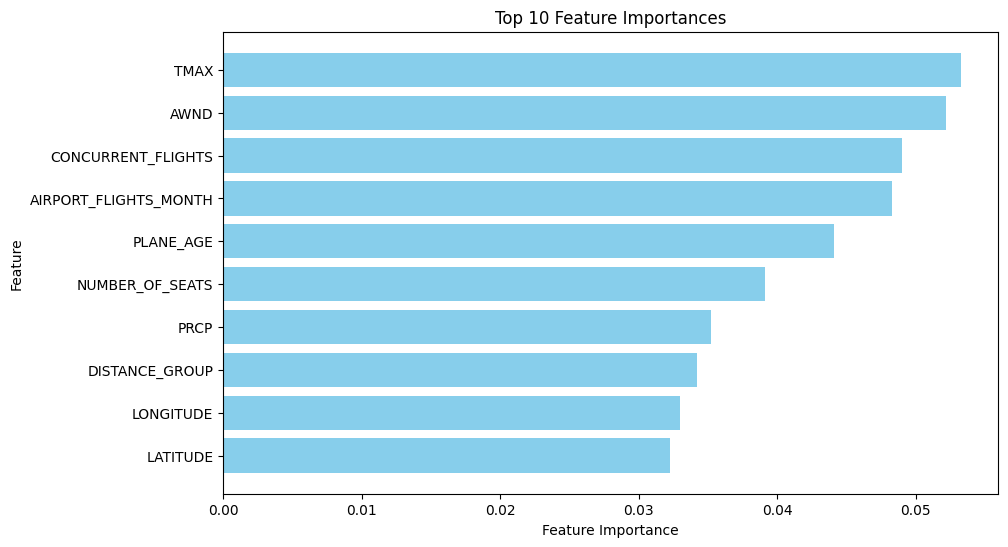

In [ ]:
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Get feature names from the preprocessor
numeric_features = preprocessor.transformers_[0][2]
categorical_features = list(preprocessor.transformers_[1][1].get_feature_names_out())
feature_names = numeric_features + categorical_features

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42))
])

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating a pipeline with preprocessing and a Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Making predictions on the validation set
y_pred = pipeline.predict(X_val)

# Evaluating the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8075

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1615
           1       0.50      0.01      0.03       385

    accuracy                           0.81      2000
   macro avg       0.65      0.50      0.46      2000
weighted avg       0.75      0.81      0.73      2000



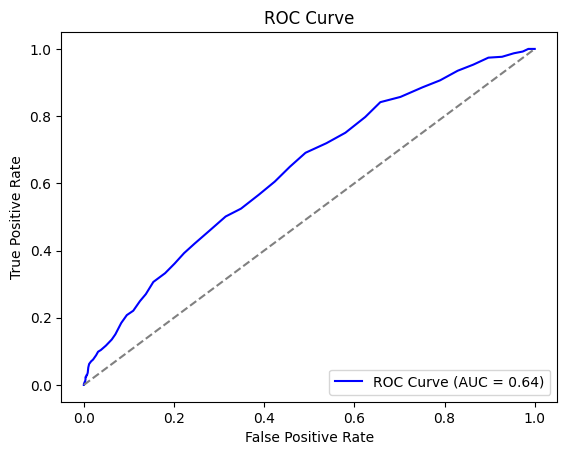

In [ ]:
# ROC for Random Forest
y_pred_prob = pipeline.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

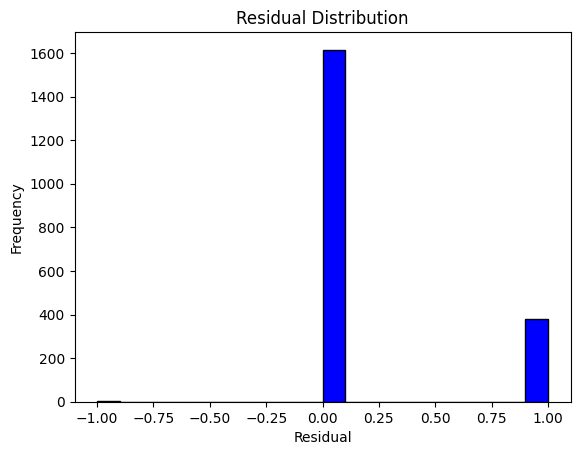

In [ ]:
# Calculate residuals
residuals = y_val - y_pred

# Plot histogram
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# **Comparison Between Models**

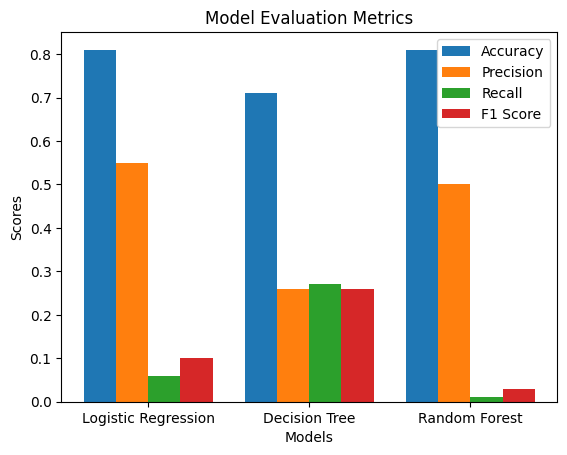

In [ ]:
# Define updated metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.81, 0.71, 0.81]
precision = [0.55, 0.26, 0.50]
recall = [0.06, 0.27, 0.01]
f1_score = [0.10, 0.26, 0.03]

# Bar chart configuration
x = np.arange(len(models))
width = 0.2

# Plot bars
plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, precision, width, label='Precision')
plt.bar(x + width, recall, width, label='Recall')
plt.bar(x + 2 * width, f1_score, width, label='F1 Score')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')
plt.xticks(x + width / 2, models)  # Centre the x-ticks
plt.legend()

# Show plot
plt.show()